<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/GradientDecent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

# 損失函數
def Loss_fn(x,y):
  return x**2 + y**2

# 計算微分
def differential(F,x,y):
  Δ = 0.000001
  return (F(x+0.5*Δ,y)-F(x-0.5*Δ,y))/Δ,(F(x,y+0.5*Δ)-F(x,y-0.5*Δ))/Δ

In [0]:
# 學習率
lr = 0.1
# 初始權重
xi,yi = 3.0,2.0

# 創建計算表 給定初始權重

In [3]:
compute_table = pd.DataFrame(index=[*range(100)],columns=['x','y','∂z/∂x','∂z/∂y','Δx','Δy','z'])
compute_table.iloc[0]['x','y'] = xi,yi
compute_table

,x,y,∂z/∂x,∂z/∂y,Δx,Δy,z
0,3,2,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 計算梯度

In [4]:
compute_table.iloc[0]['∂z/∂x','∂z/∂y'] = differential(Loss_fn,xi,yi)
compute_table

,x,y,∂z/∂x,∂z/∂y,Δx,Δy,z
0,3,2,6,4,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 計算權重必須更新的量('Δx','Δy')

In [5]:
compute_table.iloc[0]['Δx','Δy'] = -lr*differential(Loss_fn,xi,yi)[0],-lr*differential(Loss_fn,xi,yi)[1]
compute_table

,x,y,∂z/∂x,∂z/∂y,Δx,Δy,z
0,3,2,6,4,-0.6,-0.4,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 計算損失

In [6]:
compute_table.iloc[0]['z'] = Loss_fn(xi,yi)
compute_table

,x,y,∂z/∂x,∂z/∂y,Δx,Δy,z
0,3,2,6,4,-0.6,-0.4,13
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
def train(x,y,loss_fn,lr,epochs):
  # 創建計算表格
  compute_table = pd.DataFrame(index=[*range(epochs)],columns=['x','y','∂z/∂x','∂z/∂y','Δx','Δy','z'])
  for i in range(epochs):
    # record x,y
    compute_table.iloc[i]['x','y'] = x,y 
    # caculate gradient
    compute_table.iloc[i]['∂z/∂x','∂z/∂y'] = differential(Loss_fn,x,y) 
    # caculate -learning_rate*gradient
    compute_table.iloc[i]['Δx','Δy'] = -lr*differential(Loss_fn,x,y)[0] , -lr*differential(Loss_fn,x,y)[1] 
    # caculate loss
    compute_table.iloc[i]['z'] = Loss_fn(x,y)
    # weight update
    x = x + compute_table.iloc[i]['Δx']
    y = y + compute_table.iloc[i]['Δy']
    # print loss
    print(compute_table.iloc[i]['z'])
  return compute_table

In [8]:
result = train(3,2,Loss_fn,0.1,30)

13
8.319999999418524
5.324799999117199
3.407871999008293
2.181038079307698
1.395864370699198
0.8933531972641677
0.5717460462810388
0.36591746962309013
0.2341871805649342
0.14987979555813846
0.09592306915781094
0.061390764260565334
0.039290089127391445
0.0251456570418145
0.016093220506929868
0.010299661124444985
0.006591783119633937
0.004218741196565786
0.002699994365807157
0.001727996394115823
0.001105917692232721
0.0007077873230273048
0.00045298388673742015
0.00028990968751182306
0.00018554220000756438
0.00011874700800478357
7.599808512303376e-05
4.863877447876136e-05
3.112881566642014e-05


In [9]:
result

,x,y,∂z/∂x,∂z/∂y,Δx,Δy,z
0,3,2,6,4,-0.6,-0.4,13
1,2.4,1.6,4.8,3.2,-0.48,-0.32,8.32
2,1.92,1.28,3.84,2.56,-0.384,-0.256,5.3248
3,1.536,1.024,3.072,2.048,-0.3072,-0.2048,3.40787
4,1.2288,0.8192,2.4576,1.6384,-0.24576,-0.16384,2.18104
5,0.98304,0.65536,1.96608,1.31072,-0.196608,-0.131072,1.39586
6,0.786432,0.524288,1.57286,1.04858,-0.157286,-0.104858,0.893353
7,0.629146,0.41943,1.25829,0.838861,-0.125829,-0.0838861,0.571746
8,0.503316,0.335544,1.00663,0.671089,-0.100663,-0.0671089,0.365917
9,0.402653,0.268435,0.805306,0.536871,-0.0805306,-0.0536871,0.234187


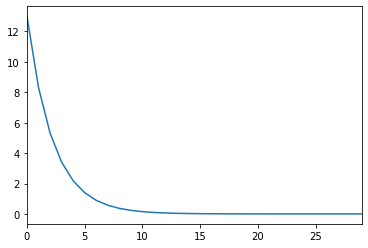

In [10]:
result['z'].plot()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 定義每次動畫更新時要做的動作
def update(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        step_text.set_text(step_template %(num))
 
    return lines

# 初始化畫布

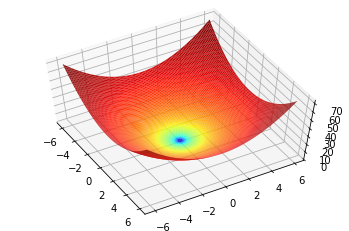

In [12]:
fig = plt.figure()
axis = fig.gca(projection='3d')
x0 = np.arange(-6.0, 6.0, 0.1)
x1 = np.arange(-6.0, 6.0, 0.1)
X, Y = np.meshgrid(x0, x1)
Z = X**2 + Y**2
surface = axis.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,norm = LogNorm())
axis.view_init(60, -30)

In [0]:
# 顯示時間的變化
step_text = axis.text(0.5, 0.9, 0.9, '', transform=axis.transAxes)
step_template = 'step = %d'

# 準備資料(x,y,z的歷史軌跡)

In [0]:
data3D = [np.array([[pt for pt in result['x']], [pt for pt in result['y']], [pt for pt in result['z']]])]
lines = [axis.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1], 'go-',color='black')[0] for dat in data3D]

# 製作動畫與保存

In [0]:
gradientDescent2DAnime = FuncAnimation(fig, update, frames=20,  interval = 500, fargs=(data3D, lines))
gradientDescent2DAnime.save('gradientDescent2DAnime.mp4', fps=1, extra_args=['-vcodec', 'libx264'])